CREDIT CARD FRAUD DETECTION


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


IMPORTING DATA

In [2]:
data=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv",sep=",")


EXPLORATORY DATA ANALYSIS

In [3]:
print(data.head)
print(data.isnull().values.any())
frauddata=data.loc[data['Class']==1]
accuratedata=data.loc[data['Class']==0]
print(frauddata.shape)
print(accuratedata.shape)
print(frauddata.describe())

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

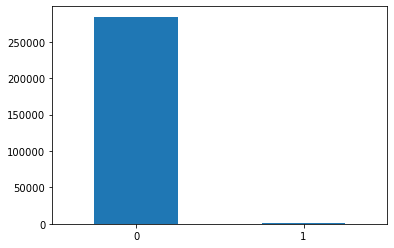

In [4]:
countvalues=pd.value_counts(data['Class'],sort=True)
countvalues.plot(kind='bar',rot=0)


count     284807
unique         2
top        False
freq      284315
Name: Class, dtype: object


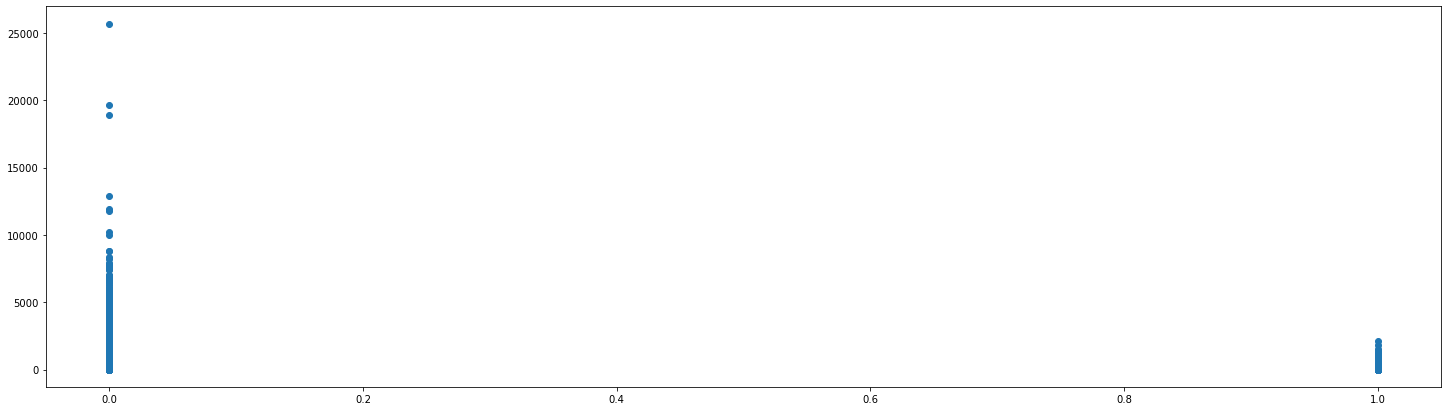

In [5]:
fraud=data['Class']==1
correct=data['Class']==0
#print(fraud.head)
#print(fraud.shape)
plt.figure(figsize=(25,7))
plt.scatter(data['Class'],data['Amount'])
print(fraud.describe())


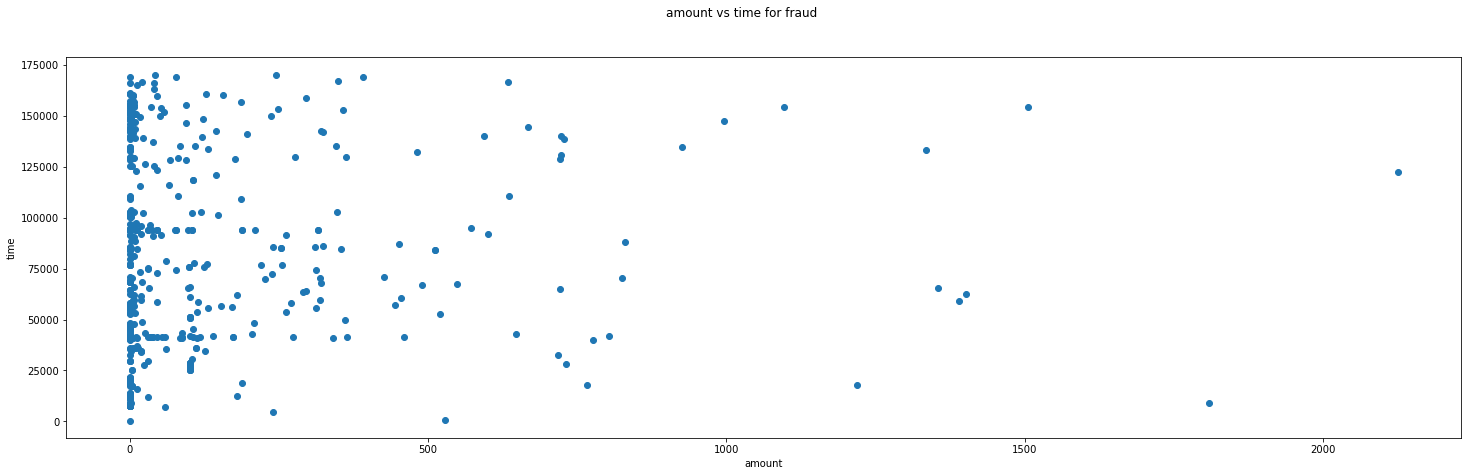

In [6]:
f,ax=plt.subplots(figsize=(25,7))
f.suptitle('amount vs time for fraud')
ax.scatter(x=frauddata['Amount'],y=frauddata['Time'])
ax.set_xlabel('amount')
ax.set_ylabel('time')
plt.show()

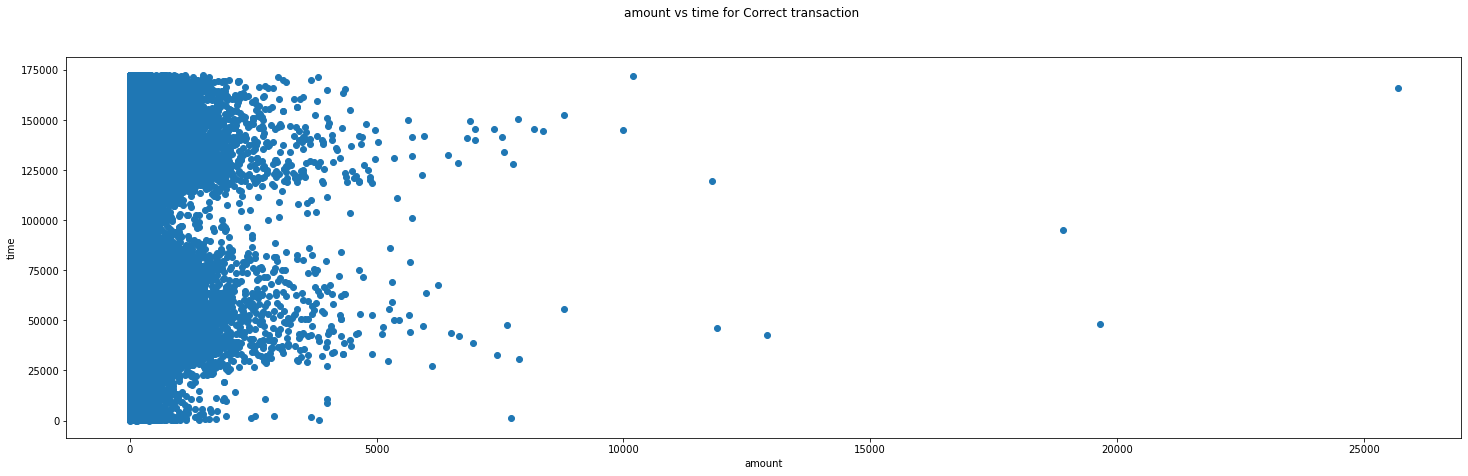

In [7]:
f,ax=plt.subplots(figsize=(25,7))
f.suptitle('amount vs time for Correct transaction')
ax.scatter(x=accuratedata['Amount'],y=accuratedata['Time'])
ax.set_xlabel('amount')
ax.set_ylabel('time')
plt.show()

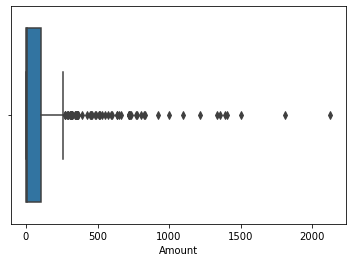

In [8]:
sns.boxplot(frauddata['Amount'])

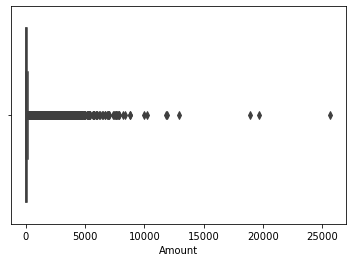

In [9]:
sns.boxplot(accuratedata['Amount'])

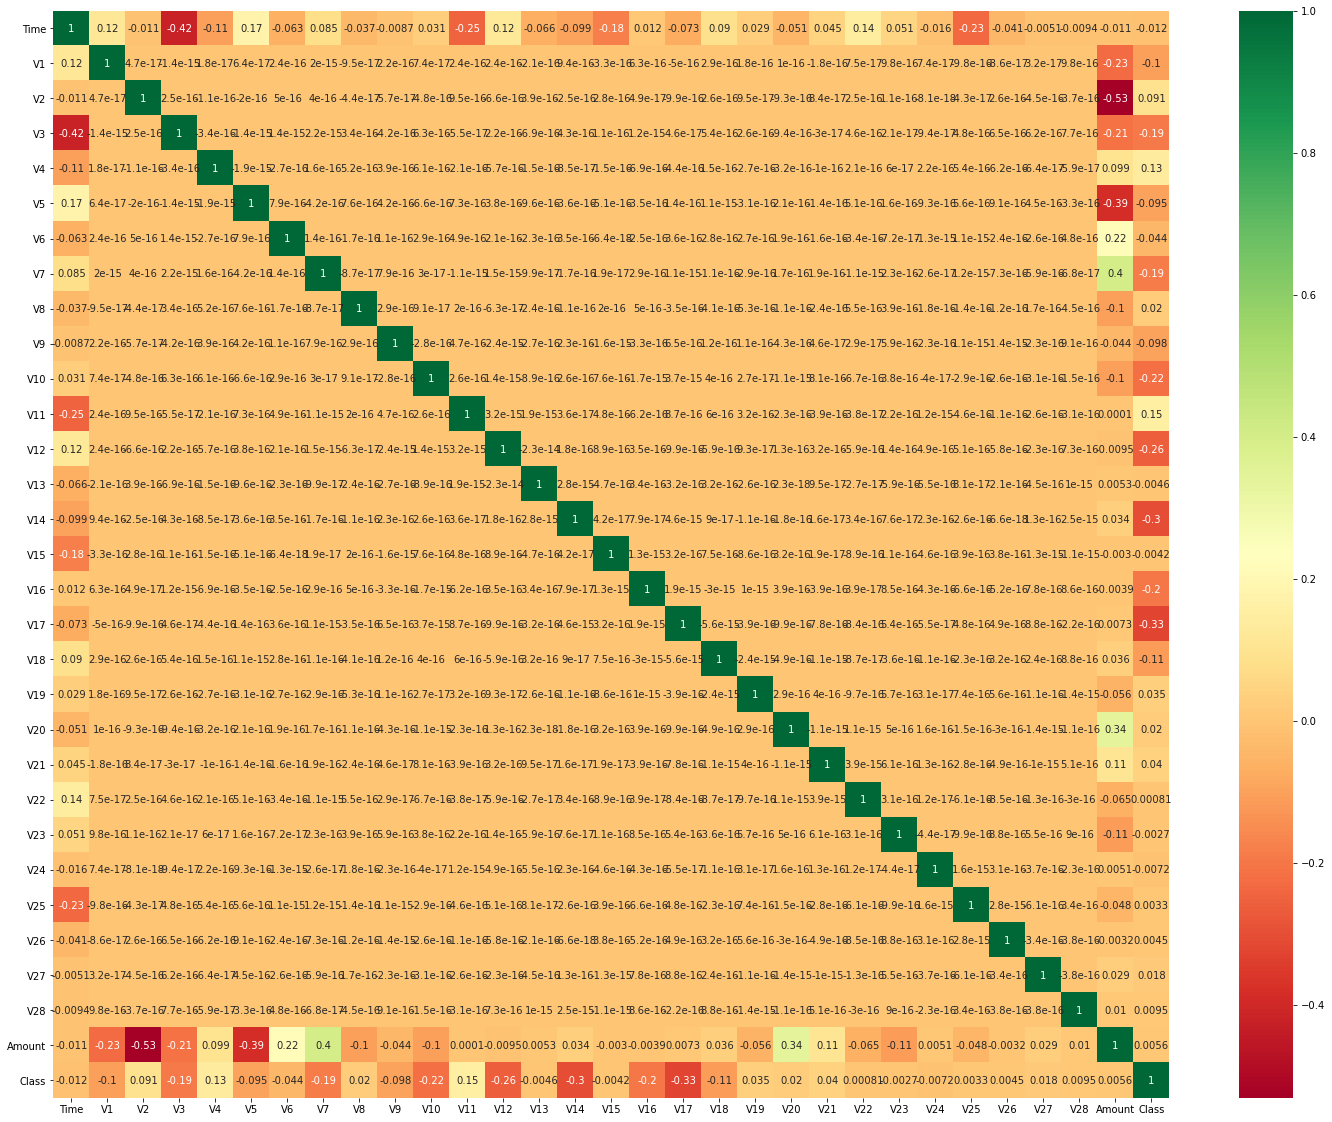

In [10]:
plt.figure(figsize=(25,20))
cormat=data.corr()
top_corr_features=cormat.index
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

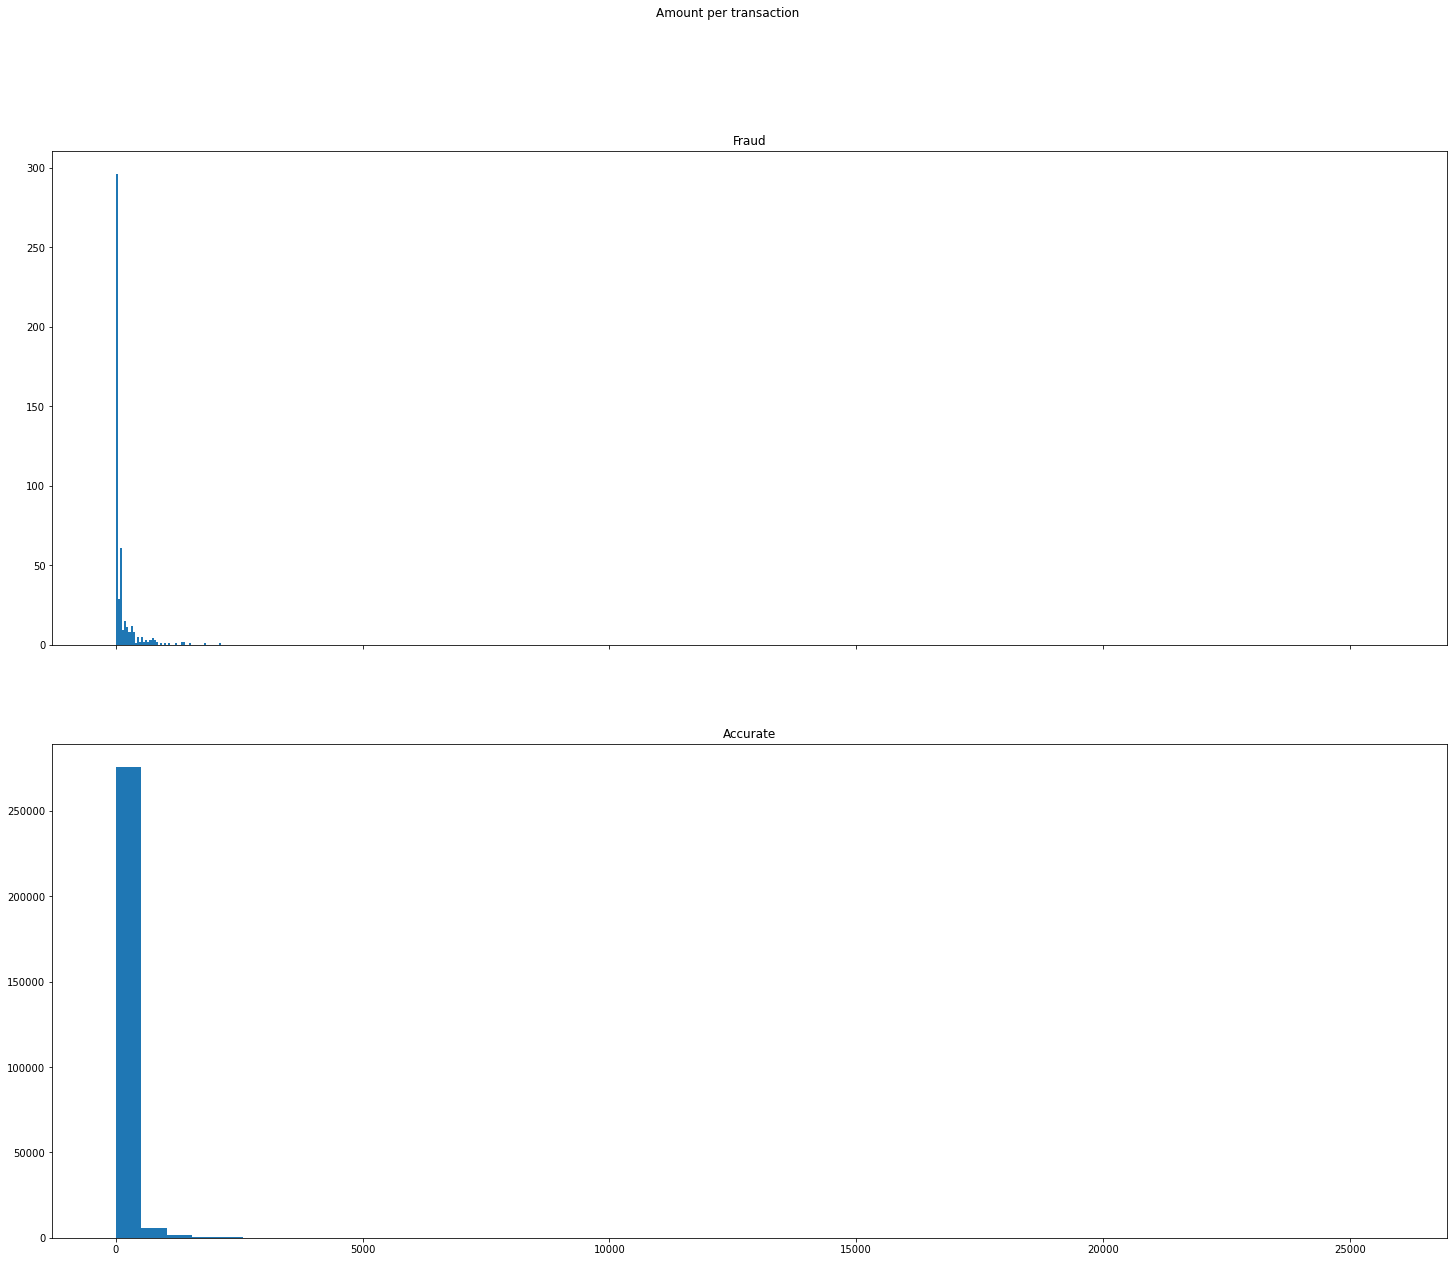

In [11]:
f,(ax,ax1)=plt.subplots(2,1,sharex=True,figsize=(25,20))
f.suptitle("Amount per transaction")
ax.hist(frauddata['Amount'],bins=50)
ax.set_title('Fraud')
ax1.hist(accuratedata['Amount'],bins=50)
ax1.set_title('Accurate')
plt.show()

NO NEED OF FEATURE SCALING AS THERE IS NO EWMPTY SPACE IN DATASET

In [12]:
x=data.drop(['Class'],axis=1)
y=data['Class']
from sklearn.model_selection import train_test_split
xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
import xgboost
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
lgrcv=LogisticRegressionCV()
xg=xgboost.XGBClassifier()
models=[rfc,gbc,lgrcv,xg]

(227845, 30)
(227845,)
(56962, 30)
(56962,)


def computescore(clf,x,y,scoring='accuracy'):
    xval=cross_val_score(clf,x,y,cv=10,scoring=scoring)
    return np.mean(xval)

for model in models:
    print("cross validation of:{}".format(model.__class__))
    score=computescore(model,xtrain,xtest,scoring='accuracy')
    print(score)

In [13]:
xg.fit(xtrain,xtest)
ypred=xg.predict(ytrain)

hyperparameter tuning

In [14]:
print(xtrain.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


DETERMINING THE IMPORTANCE OF EACH FEATURES USING XG

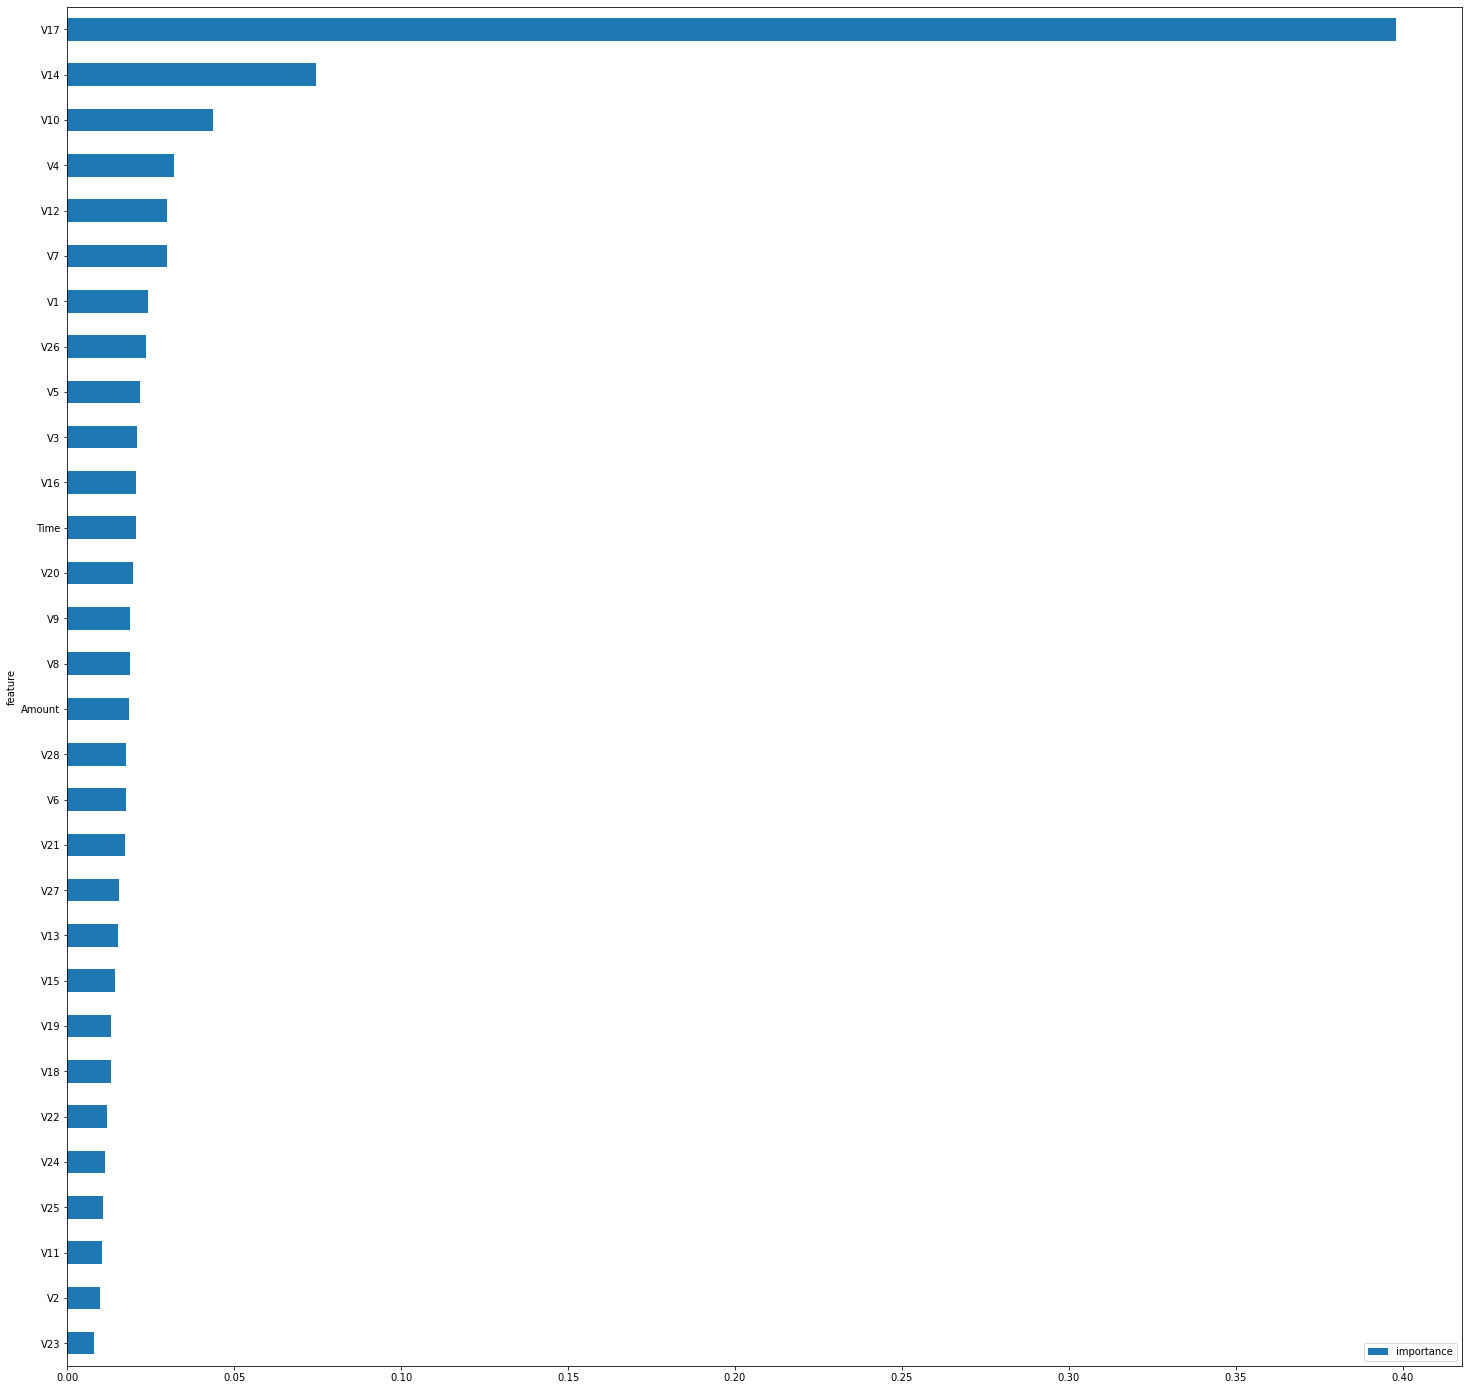

In [15]:
from sklearn.feature_selection import SelectFromModel
features=pd.DataFrame()
features['feature']=xtrain.columns
features['importance']=xg.feature_importances_
features.sort_values(by=['importance'],ascending=True,inplace=True)
features.set_index('feature',inplace=True)
features.plot(kind='barh',figsize=(25,25))



DETERMINING THE ACCURACY OF OUR PREDICTIONS

In [16]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

NUMBER OF ERRORS IN OUR PREDICTIONS

In [17]:
n_errors=(ypred!=ytest).sum()
print("TOTAL NUMBER OF ERROS",n_errors)

TOTAL NUMBER OF ERROS 21


In [18]:
print("the model used is XGBClassifier")
acc=accuracy_score(ytest,ypred)
print("Accuracy Score",acc)
pscore=precision_score(ytest,ypred)
print("Precision Score",pscore)
rscore=recall_score(ytest,ypred)
print("Recall Score",rscore)
fscore=f1_score(ytest,ypred)
print("F1 Score",fscore)
mscore=matthews_corrcoef(ytest,ypred)
print("matthews correlation coefficient",mscore)
cscore=classification_report(ytest,ypred)
print("classification report")
print(cscore)

the model used is XGBClassifier
Accuracy Score 0.9996313331694814
Precision Score 0.9873417721518988
Recall Score 0.7959183673469388
F1 Score 0.8813559322033897
matthews correlation coefficient 0.8863104705773162
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



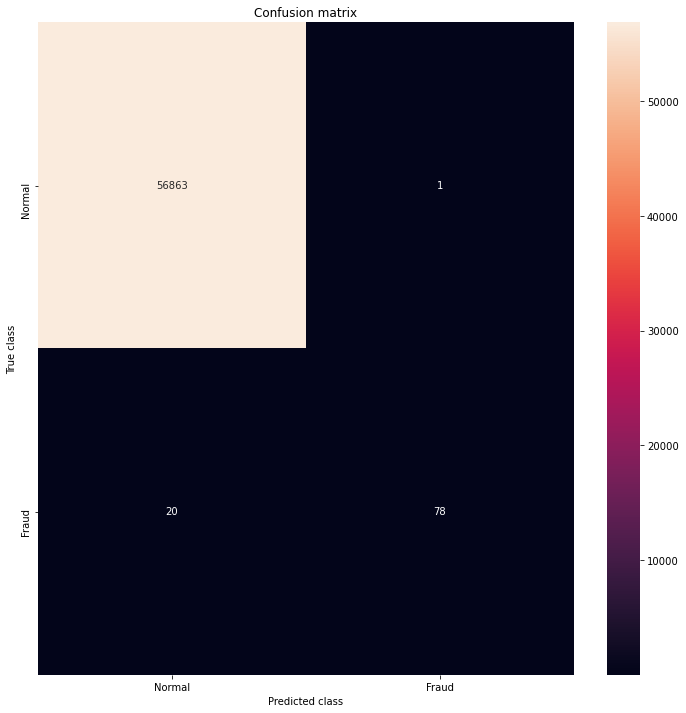

In [19]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(ytest, ypred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 